In [1]:
import json

import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open("twitter_network.json", 'r') as f:
    data = json.load(f)

In [3]:
nodes = {}
ct = 0

all_users = [f for i in data.values() for f in i ]
_ = [all_users.append(a) for a in data.keys()]


for v in set(all_users):
    nodes[v] = ct
    ct += 1 

In [4]:
relationships = []
for k, v in data.items():
    for f in v:
        relationships.append((nodes[k], nodes[f]))

In [5]:
print(f"Number of relationships: {len(relationships)}")

Number of relationships: 151556


In [6]:
WG=nx.DiGraph()
WG.add_edges_from(relationships)

In [7]:
print(nx.info(WG))

Name: 
Type: DiGraph
Number of nodes: 77612
Number of edges: 151538
Average in degree:   1.9525
Average out degree:   1.9525


In [8]:
WG.number_of_nodes()

77612

In [9]:
ind = WG.in_degree()

In [10]:
ind = dict(ind)

In [11]:
in_degree_list = np.transpose(list(ind.values()))

In [12]:
sorted_in_degree_list = np.sort(in_degree_list)[::-1]

In [13]:
sorted_in_degree_list

array([75, 69, 62, ...,  0,  0,  0])

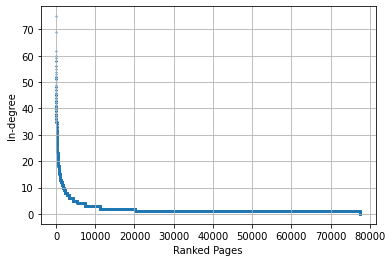

In [14]:
x_range = list(range(0, in_degree_list.size, 1))
plt.scatter(x_range,sorted_in_degree_list,s=1)
plt.ylabel('In-degree')
plt.xlabel('Ranked Pages')
# plt.autoscale(tight=True)
plt.grid()
plt.show()

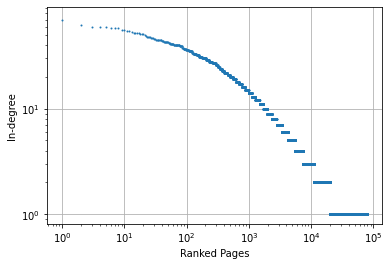

In [15]:
plt.loglog(x_range,sorted_in_degree_list, 'o', ms=1)
plt.ylabel('In-degree')
plt.xlabel('Ranked Pages')
# plt.autoscale(tight=True)
plt.grid()
plt.show()

#### Centrality or popularity measures on a network often follow a power-law distribution

Reference: http://www.hpl.hp.com/research/idl/papers/ranking/ranking.html

In [16]:
outd = WG.out_degree()
outd=dict(outd)

In [17]:
out_degree_list = np.transpose(list(outd.values()))
sorted_out_degree_list = np.sort(out_degree_list)[::-1]

In [18]:
sorted_out_degree_list

array([15047,  7968,  7309, ...,     0,     0,     0])

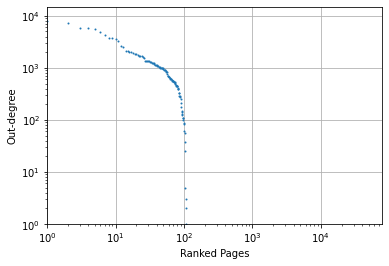

In [19]:
x_range = list(range(0, out_degree_list.size, 1))
plt.loglog(x_range,sorted_out_degree_list, 'o', ms=1)
plt.ylabel('Out-degree')
plt.xlabel('Ranked Pages')
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [20]:
np.median(sorted_out_degree_list)

0.0

In [21]:
np.median(sorted_in_degree_list)

1.0

#### Correlation between in-degree and out-degree

Related Reference: http://pubsonline.informs.org/doi/abs/10.1287/isre.1080.0231

In [22]:
import scipy.stats as st
st.spearmanr(list(outd.values()), list(ind.values()))

SpearmanrResult(correlation=-0.08398034806274068, pvalue=1.7914227850271145e-121)

#### Computing Pagerank

Reference: https://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

In [23]:
%%time
pr = nx.pagerank(WG)

CPU times: user 1.15 s, sys: 22.3 ms, total: 1.17 s
Wall time: 1.17 s


In [24]:
pr_list = np.transpose(list(pr.values()))

In [25]:
sorted_pr_list = np.sort(pr_list)[::-1]

In [26]:
sorted_pr_list

array([2.69755202e-05, 1.85458155e-05, 1.85090647e-05, ...,
       1.28692244e-05, 1.28692244e-05, 1.28692244e-05])

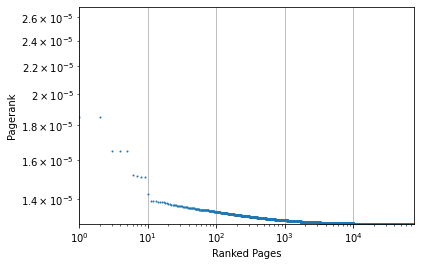

In [27]:
x_range = list(range(0, pr_list.size, 1))
plt.loglog(x_range,sorted_pr_list, 'o', ms=1)
plt.ylabel('Pagerank')
plt.xlabel('Ranked Pages')
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [28]:
#correlation between pageranks and indegrees?
st.spearmanr(list(pr.values()), list(ind.values()))

SpearmanrResult(correlation=0.6180519677366592, pvalue=0.0)

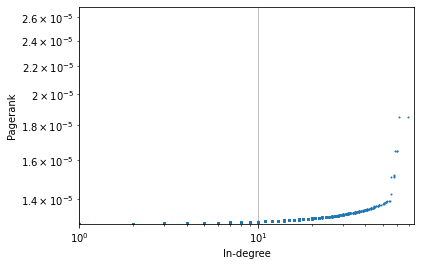

In [29]:
x_range = list(range(0, pr_list.size, 1))
plt.loglog(sorted_in_degree_list,sorted_pr_list, 'o', ms=1)
plt.ylabel('Pagerank')
plt.xlabel('In-degree')
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [30]:
#remember adjacency matrix from our loong lecture?
A = nx.adjacency_matrix(WG)

In [31]:
A

<77612x77612 sparse matrix of type '<class 'numpy.longlong'>'
	with 151538 stored elements in Compressed Sparse Row format>

In [32]:
indegree = np.asarray(sp.sparse.csr_matrix.sum(A, axis=0))
indegree = indegree.flatten()

In [33]:
np.sort(indegree).flatten()[::-1]

array([75, 69, 62, ...,  0,  0,  0], dtype=int64)

In [34]:
print(A[0])

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  (0, 25)	1
  :	:
  (0, 84)	1
  (0, 85)	1
  (0, 86)	1
  (0, 87)	1
  (0, 88)	1
  (0, 89)	1
  (0, 90)	1
  (0, 91)	1
  (0, 92)	1
  (0, 93)	1
  (0, 94)	1
  (0, 95)	1
  (0, 96)	1
  (0, 97)	1
  (0, 98)	1
  (0, 99)	1
  (0, 100)	1
  (0, 101)	1
  (0, 102)	1
  (0, 103)	1
  (0, 104)	1
  (0, 105)	1
  (0, 106)	1
  (0, 107)	1
  (0, 108)	1
